In [1]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

In [3]:
df_oneday = pd.read_csv("관광_당일여행_동반자_유형__중복응답__20240520014137.csv", encoding='utf-8')
df_moreday = pd.read_csv("관광_숙박여행_동반자_유형__중복응답__20240520014059.csv", encoding='utf-8')

In [4]:
#연령대별, 성별, 직업별, 숙박/당일 동반 유형 분포 (2019-2022)

## 숙박여행 동반자 유형 분석

### 기본 데이터

In [5]:
df_moreday

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친척,친목 단체/모임(동호회 종교단체 등),(직장)동료,학교 단체(소풍 수학여행 등),기타
0,2019,전체,소계,60.7,34.5,4.2,3.7,2.2,0.4,0.1
1,2019,성별,남자,59.5,34.8,3.8,3.7,2.6,0.5,0.2
2,2019,성별,여자,61.8,34.1,4.6,3.7,1.8,0.3,0.1
3,2019,연령,15~19세,62.0,34.1,4.1,1.8,0.4,2.6,-
4,2019,연령,20대,20.4,75.2,1.5,1,2.9,0.7,0
...,...,...,...,...,...,...,...,...,...,...
119,2022,가구소득,200~300만원 미만,48.7,47.0,3.4,4,1.4,-,0.2
120,2022,가구소득,300~400만원 미만,59.7,37.7,2.9,2.1,1.7,0.1,-
121,2022,가구소득,400~500만원 미만,69.4,27.5,3.1,1.6,1.4,0.1,-
122,2022,가구소득,500~600만원 미만,69.6,28.9,2.4,2.1,1.6,0.1,-


In [6]:
df_moreday["통계분류(1)"].unique()

array(['전체', '성별', '연령', '직업', '학력', '가구원수', '가구소득'], dtype=object)

In [7]:
df_moreday["통계분류(2)"].unique()

array(['소계', '남자', '여자', '15~19세', '20대', '30대', '40대', '50대', '60대',
       '70세 이상', '임금봉급근로자', '고용원있는사업주', '고용원없는자영업자', '무급가족 종사자', '전업주부',
       '학생', '기타', '초졸 이하', '중학교', '고등학교', '대학교이상', '1인', '2인', '3인이상',
       '100만원 미만', '100~200만원 미만', '200~300만원 미만', '300~400만원 미만',
       '400~500만원 미만', '500~600만원 미만', '600만원 이상'], dtype=object)

In [8]:
df_moreday['시점'] = df_moreday['시점'].astype(str)
df_moreday.dtypes

시점                       object
통계분류(1)                  object
통계분류(2)                  object
가족(부모 배우자 자녀 형제)        float64
친구/연인                   float64
친척                      float64
친목 단체/모임(동호회 종교단체 등)     object
(직장)동료                   object
학교 단체(소풍 수학여행 등)         object
기타                       object
dtype: object

### 성별별 동반자 유형 분석

In [9]:
df_gender = df_moreday[df_moreday["통계분류(1)"]=="성별"]
df_gender

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친척,친목 단체/모임(동호회 종교단체 등),(직장)동료,학교 단체(소풍 수학여행 등),기타
1,2019,성별,남자,59.5,34.8,3.8,3.7,2.6,0.5,0.2
2,2019,성별,여자,61.8,34.1,4.6,3.7,1.8,0.3,0.1
32,2020,성별,남자,57.8,37.9,3.9,2.1,3.3,0.1,-
33,2020,성별,여자,63.5,33.4,5.1,2,1.6,0,-
63,2021,성별,남자,61.4,36.6,2.6,1.1,2.4,-,-
64,2021,성별,여자,67.9,30.2,3.9,0.8,1.5,-,-
94,2022,성별,남자,61.1,35.3,3.0,2.3,2.5,0.2,0
95,2022,성별,여자,64.3,33.5,3.0,2,0.8,0,-


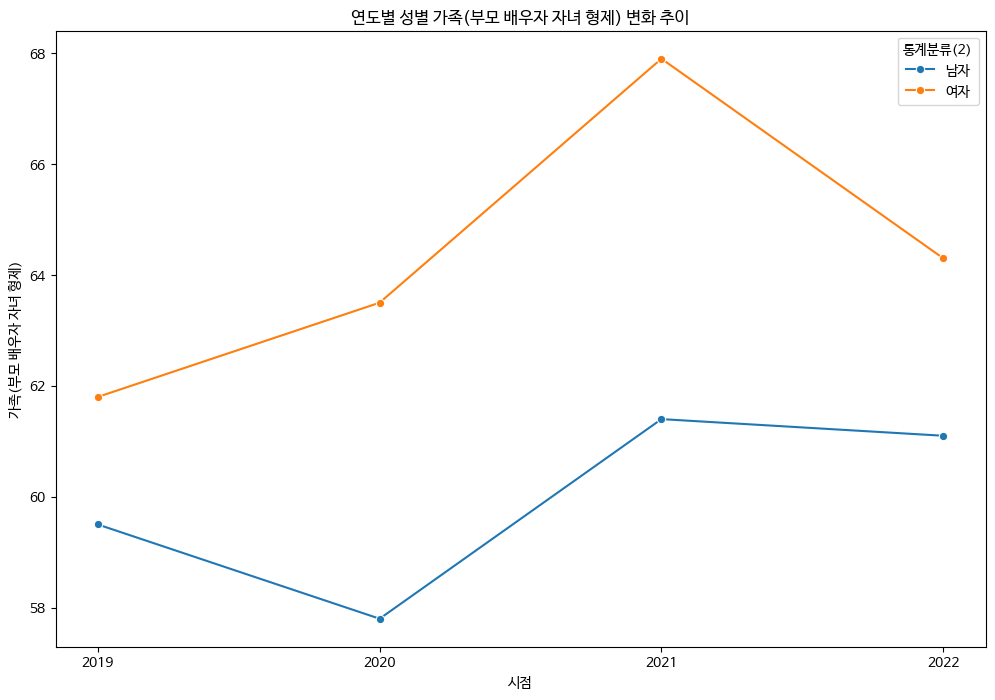

In [10]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='가족(부모 배우자 자녀 형제)', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 가족(부모 배우자 자녀 형제) 변화 추이')
plt.show()

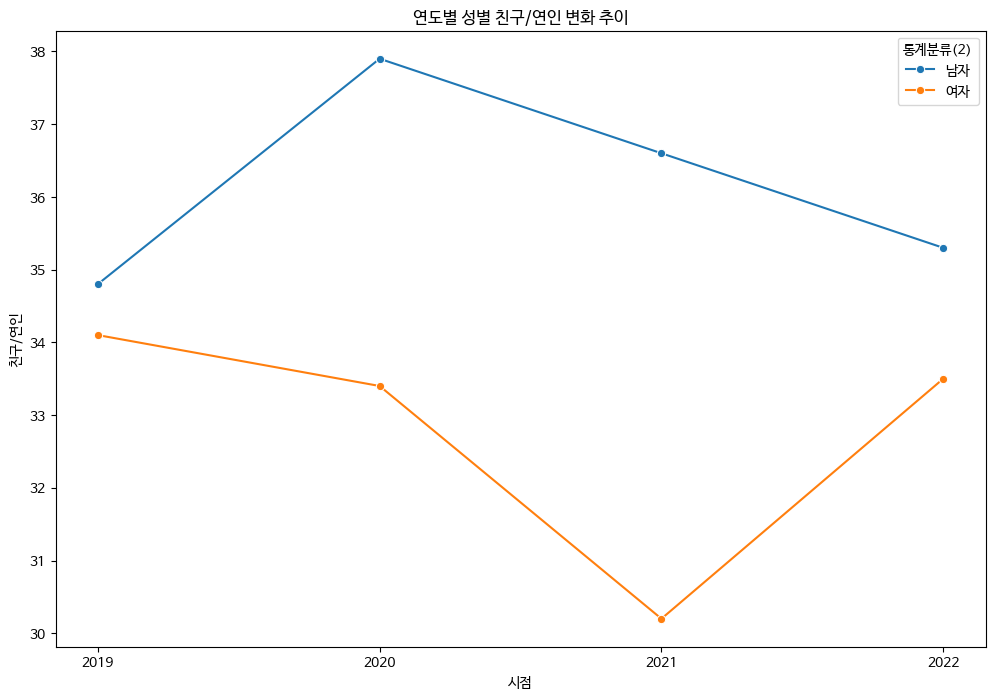

In [11]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='친구/연인', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 친구/연인 변화 추이')
plt.show()

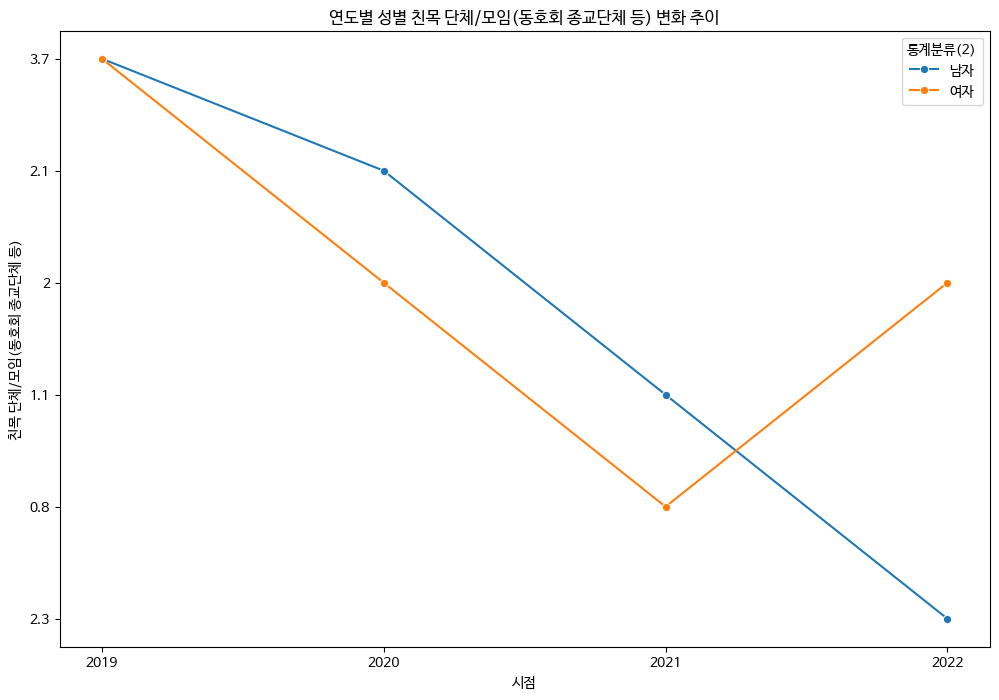

In [12]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='친목 단체/모임(동호회 종교단체 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 친목 단체/모임(동호회 종교단체 등) 변화 추이')
plt.show()

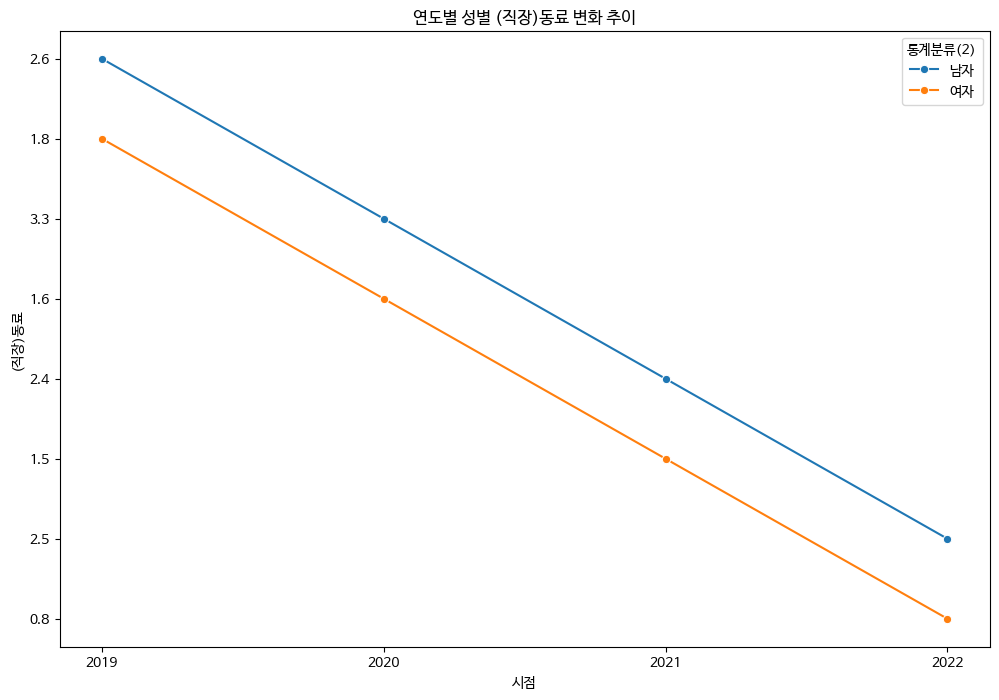

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='(직장)동료', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 (직장)동료 변화 추이')
plt.show()

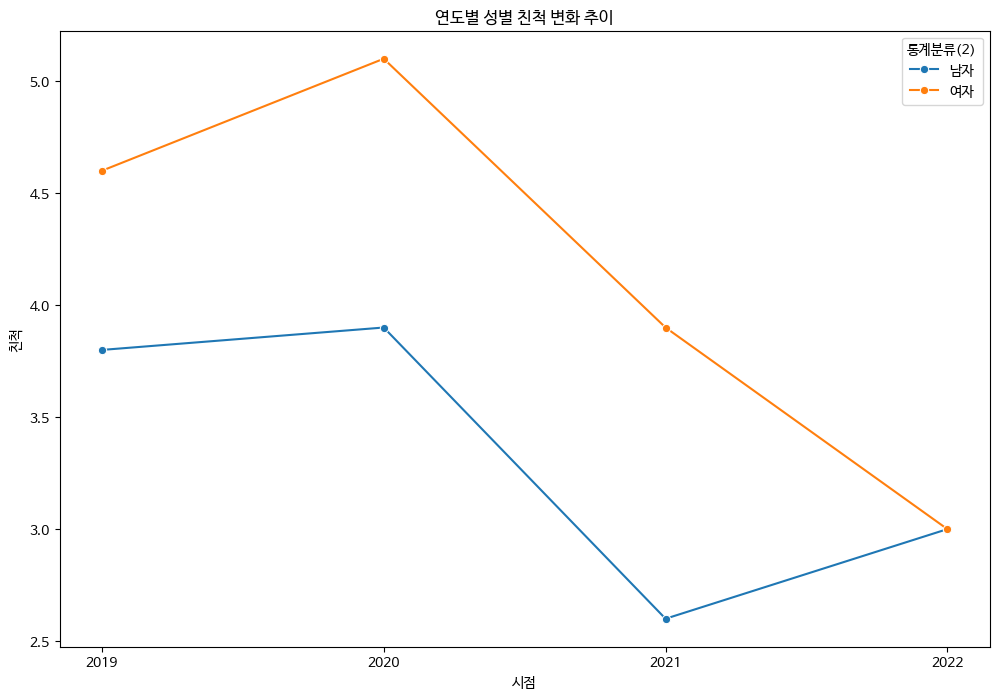

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='친척', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 친척 변화 추이')
plt.show()

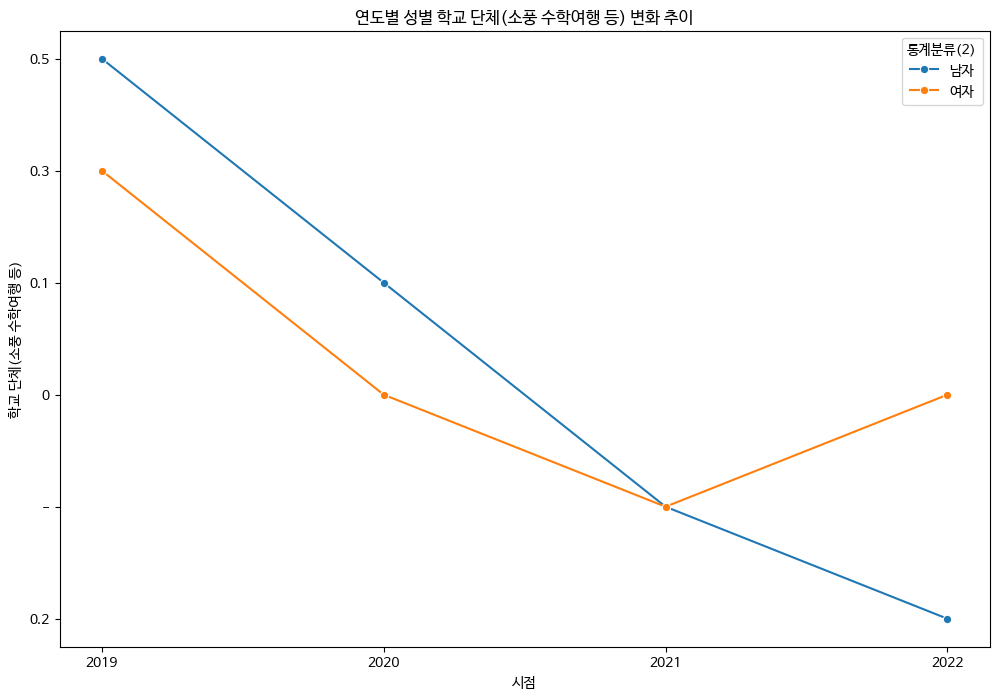

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='학교 단체(소풍 수학여행 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 학교 단체(소풍 수학여행 등) 변화 추이')
plt.show()

### 연령대별 동반자 유형 분석

In [16]:
df_age = df_moreday[df_moreday["통계분류(1)"]=="연령"]
df_age.head()

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친척,친목 단체/모임(동호회 종교단체 등),(직장)동료,학교 단체(소풍 수학여행 등),기타
3,2019,연령,15~19세,62.0,34.1,4.1,1.8,0.4,2.6,-
4,2019,연령,20대,20.4,75.2,1.5,1,2.9,0.7,0
5,2019,연령,30대,64.2,33.9,3.2,1,2.1,-,0.1
6,2019,연령,40대,78.8,16.1,4.5,2.8,3,0.1,0.2
7,2019,연령,50대,66.6,28.9,4.8,6,2.3,0.1,0.3


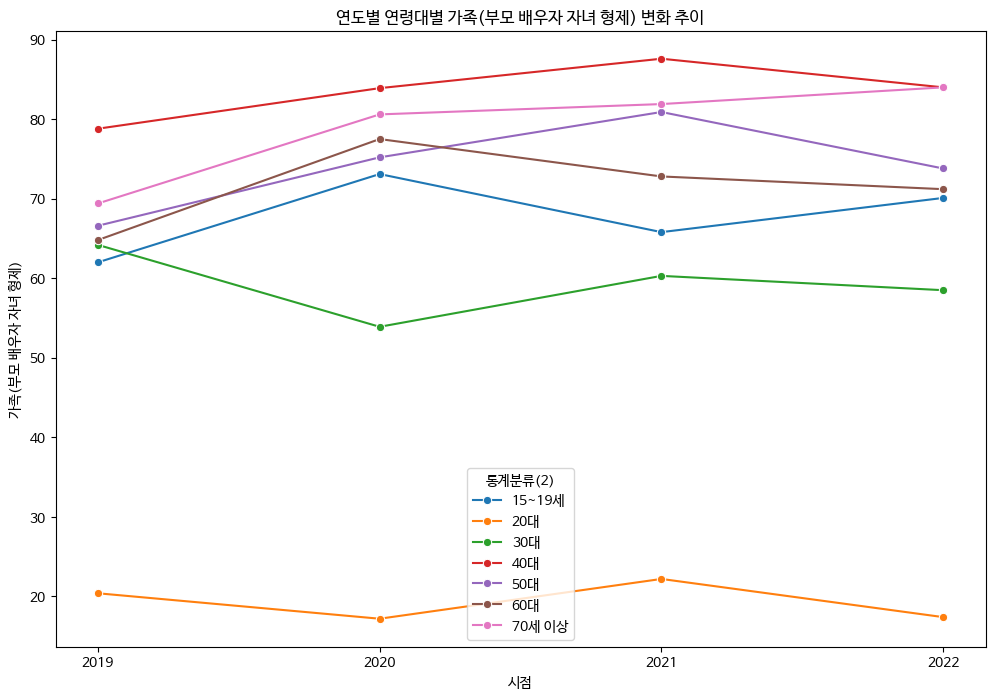

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='가족(부모 배우자 자녀 형제)', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 가족(부모 배우자 자녀 형제) 변화 추이')
plt.show()

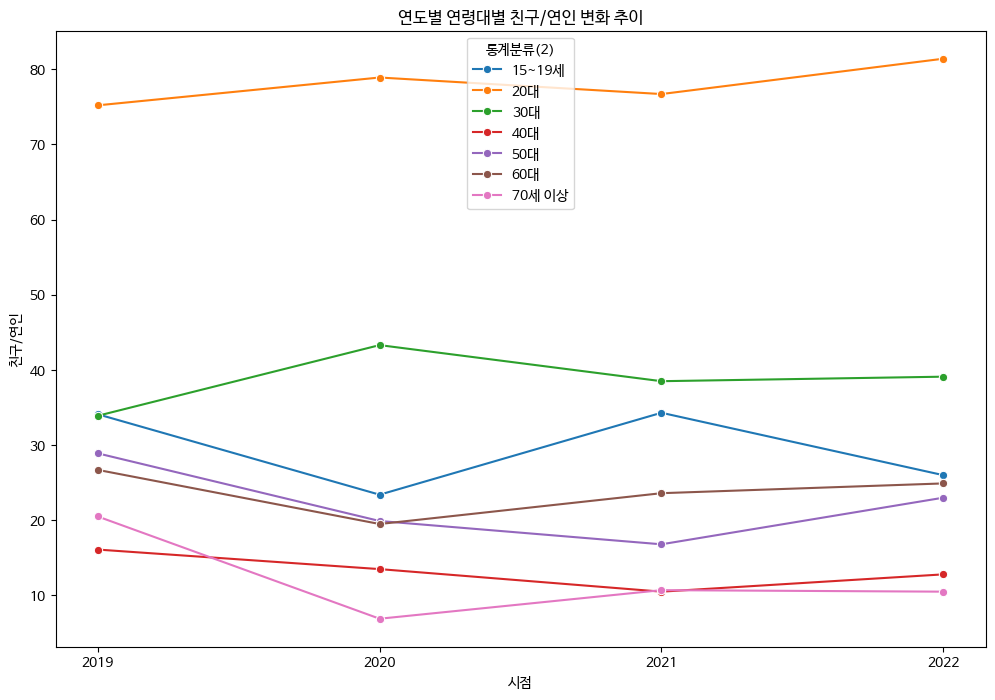

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='친구/연인', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 친구/연인 변화 추이')
plt.show()

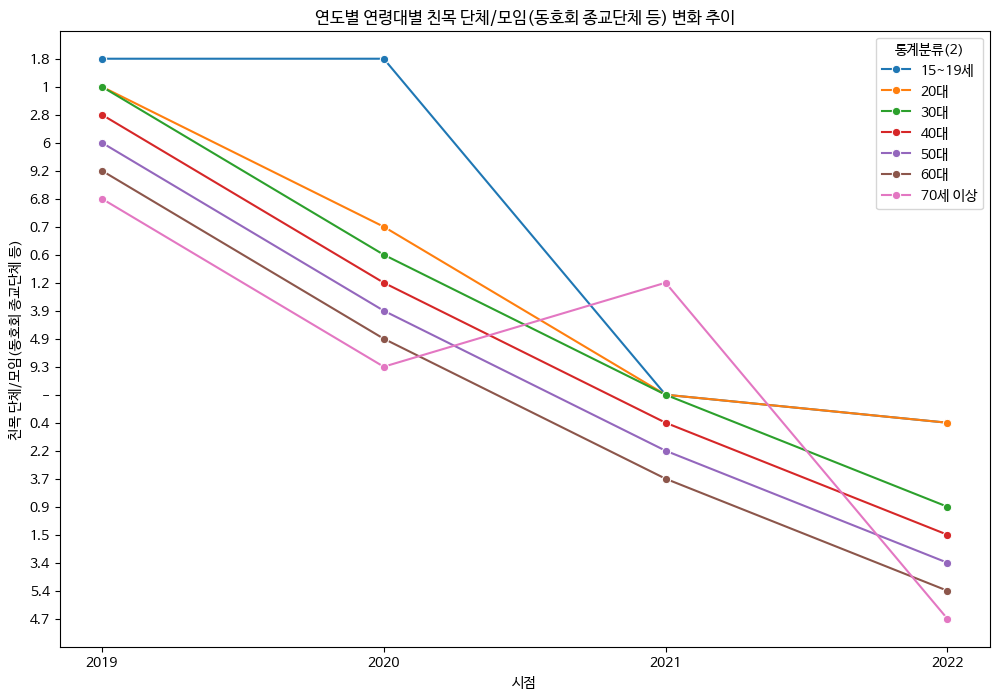

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='친목 단체/모임(동호회 종교단체 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 친목 단체/모임(동호회 종교단체 등) 변화 추이')
plt.show()

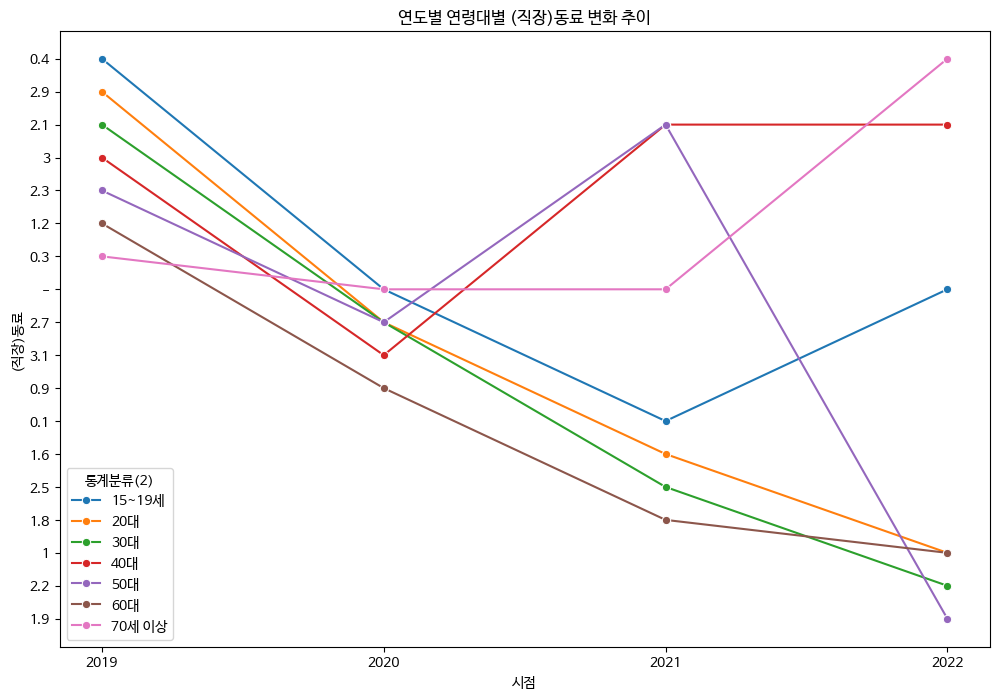

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='(직장)동료', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 (직장)동료 변화 추이')
plt.show()

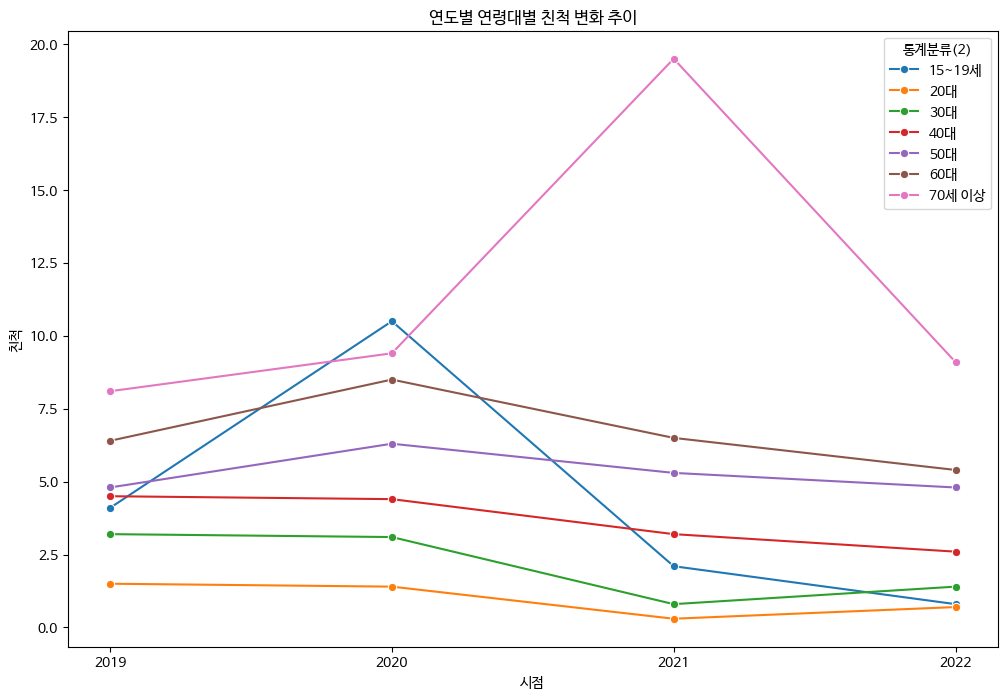

In [21]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='친척', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 친척 변화 추이')
plt.show()

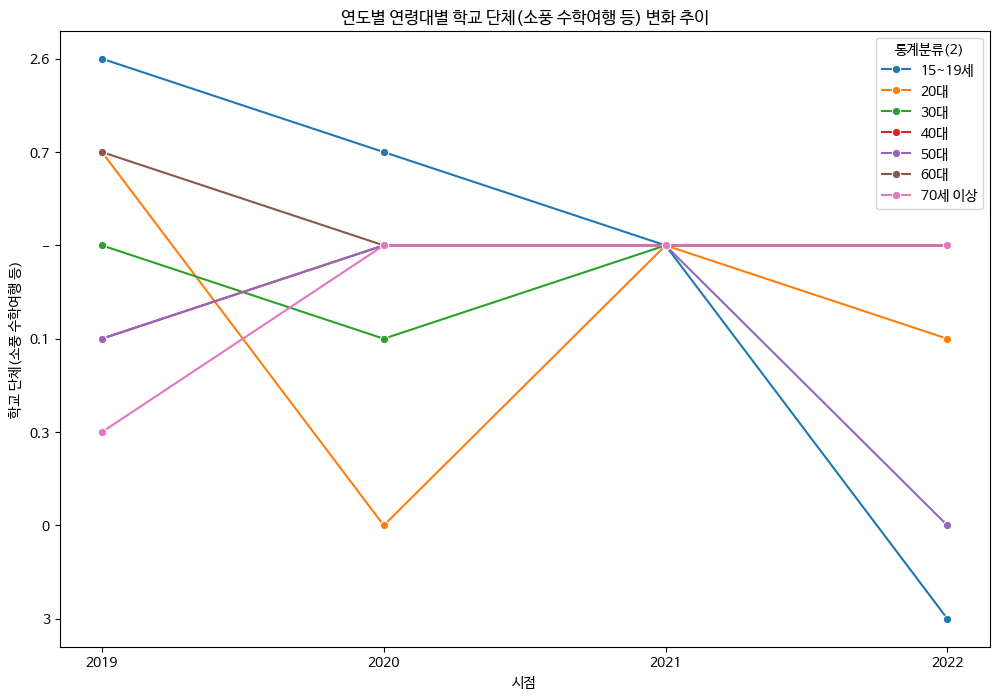

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='학교 단체(소풍 수학여행 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 학교 단체(소풍 수학여행 등) 변화 추이')
plt.show()

### 직업별 동반자 유형 분석

In [23]:
df_job = df_moreday[df_moreday["통계분류(1)"]=="직업"]
df_job.columns

Index(['시점', '통계분류(1)', '통계분류(2)', '가족(부모 배우자 자녀 형제)', '친구/연인', '친척',
       '친목 단체/모임(동호회 종교단체 등)', '(직장)동료', '학교 단체(소풍 수학여행 등)', '기타'],
      dtype='object')

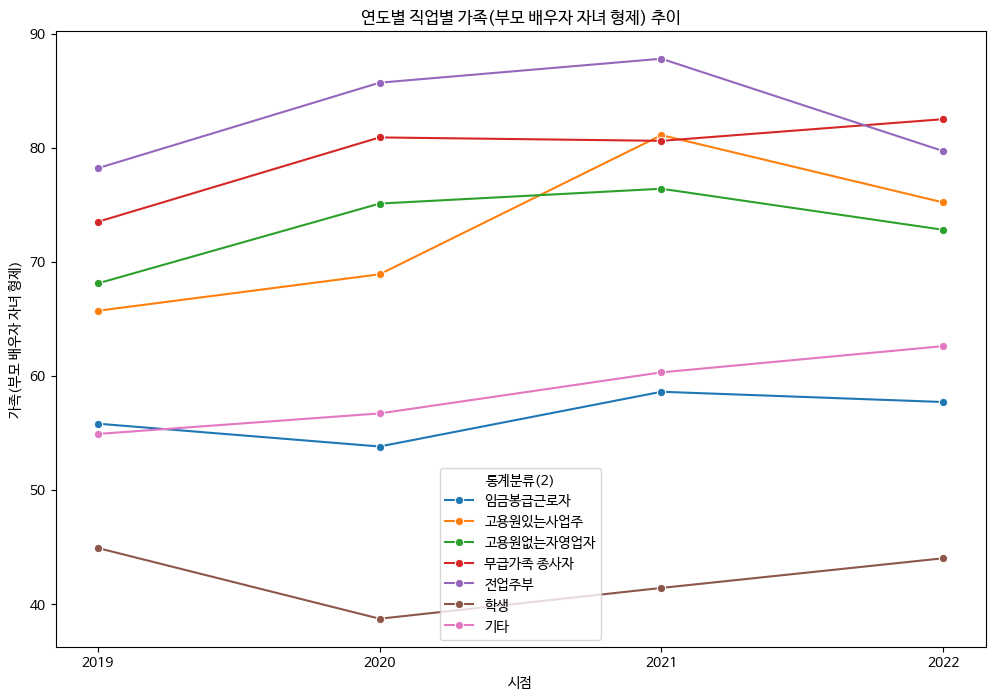

In [24]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='가족(부모 배우자 자녀 형제)', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 가족(부모 배우자 자녀 형제) 추이')
plt.show()

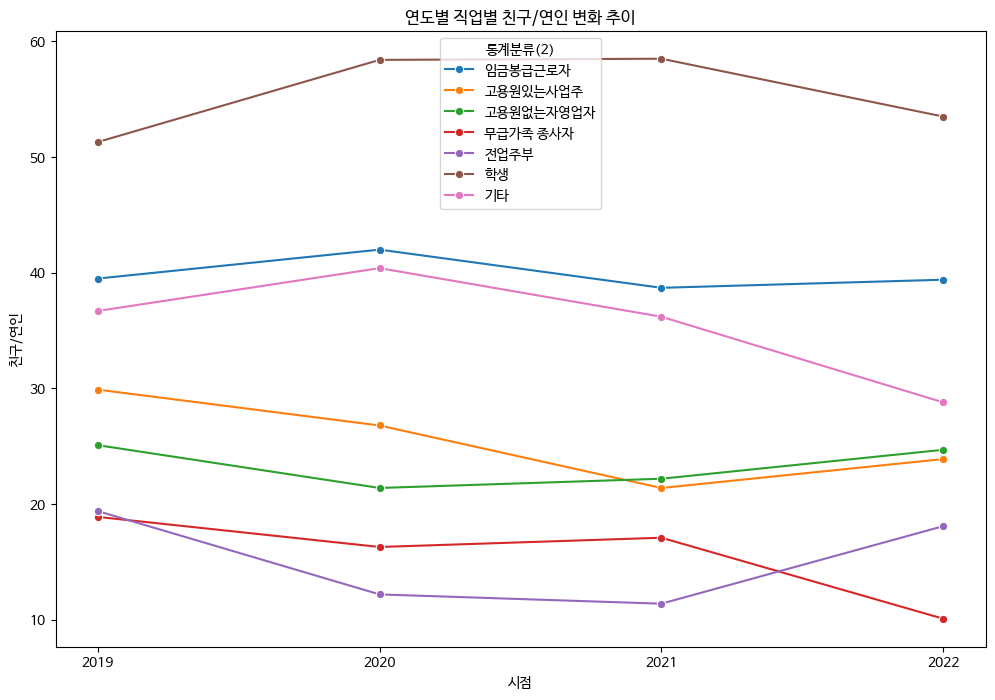

In [25]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='친구/연인', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 친구/연인 변화 추이')
plt.show()

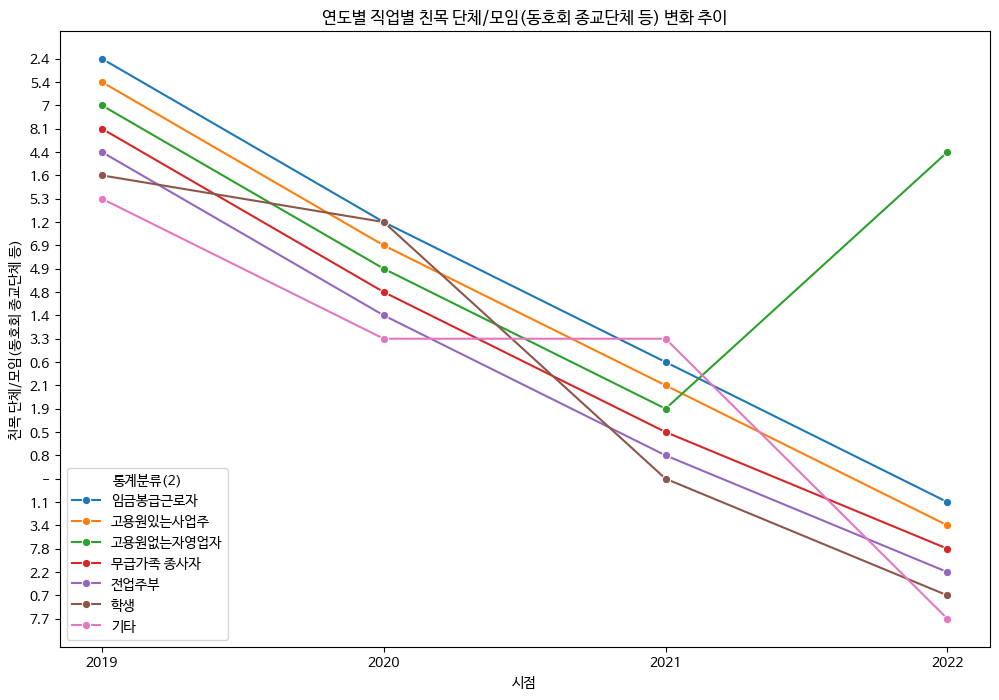

In [26]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='친목 단체/모임(동호회 종교단체 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 친목 단체/모임(동호회 종교단체 등) 변화 추이')
plt.show()

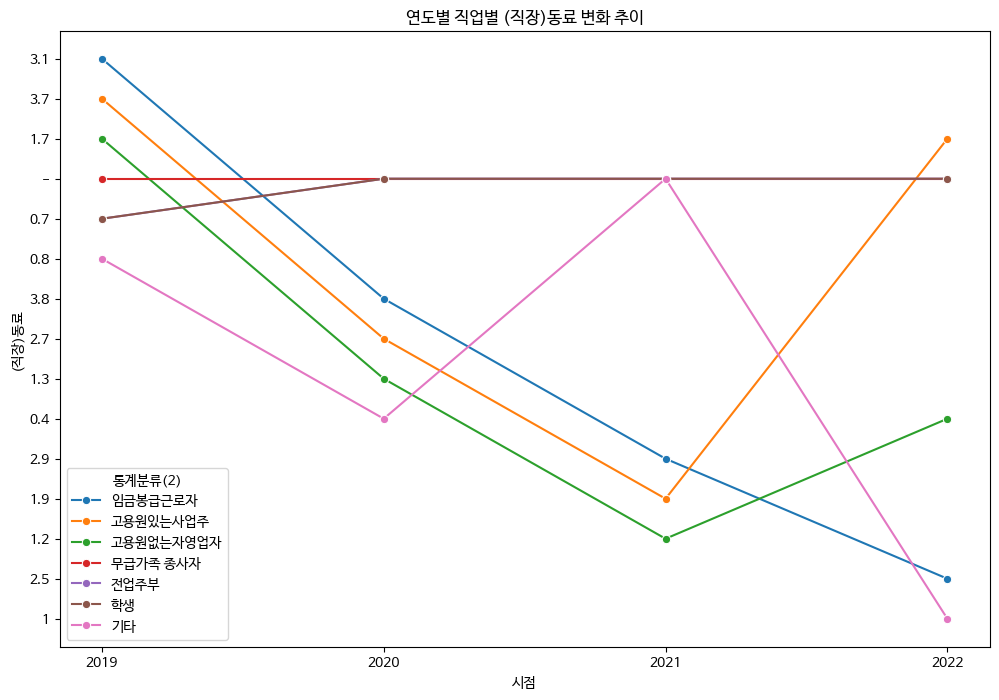

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='(직장)동료', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 (직장)동료 변화 추이')
plt.show()

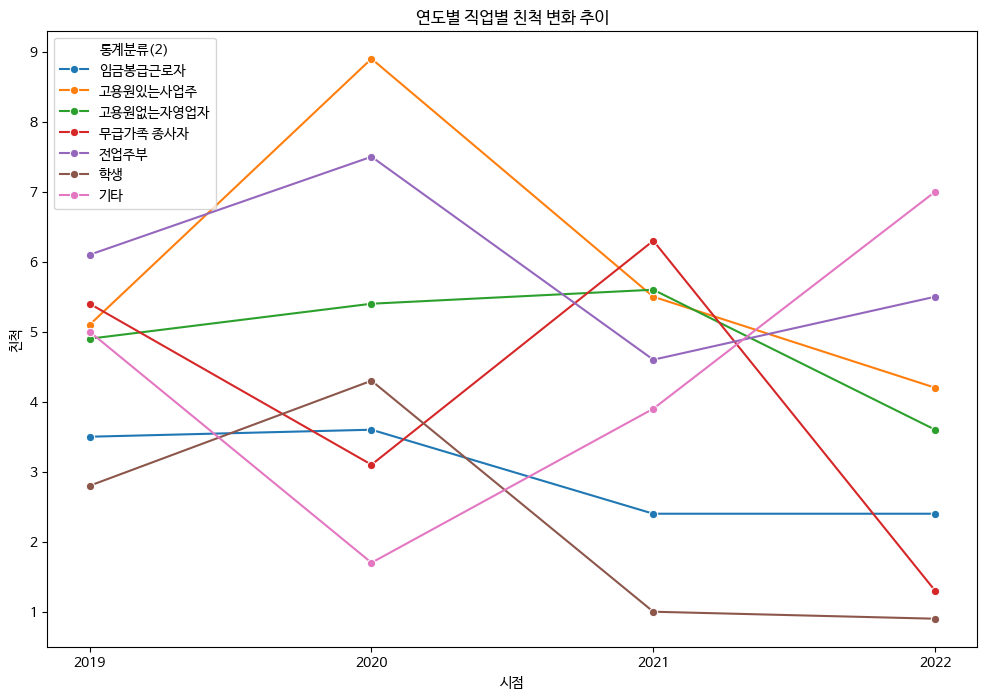

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='친척', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 친척 변화 추이')
plt.show()

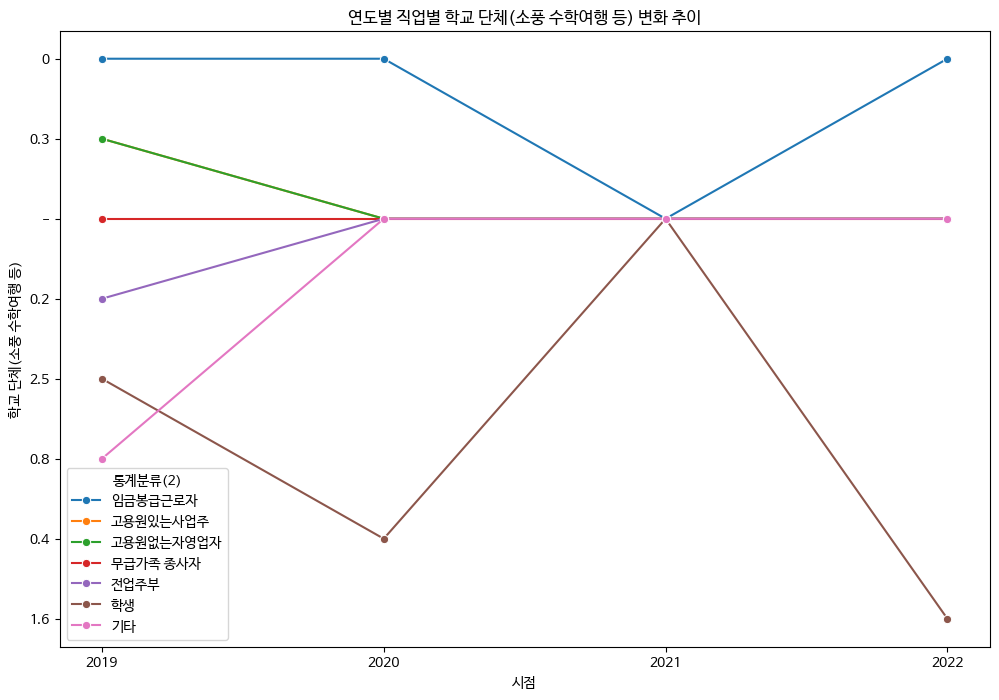

In [29]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='학교 단체(소풍 수학여행 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 학교 단체(소풍 수학여행 등) 변화 추이')
plt.show()

## 인사이트 

- 선정 기준 : 
    + 마케팅 할 대상을 고려하였을때 절대적인 수치값이 높고 상승하는 추세인 값을 선정
- 성별
     + 가족과 동반하는 여성이 약간의 하향세 값을 보이고 있지만 상대적으로 다른 값들에 비교하여 절대적으로 수치가 높기 때문에 마케팅 대상으로 고려 가능하다고 판단함.
- 연령대
    + 친구/연인과 동반하는 20대(1순위)가 최근 증가하는 추세를 보이고 있으며 가족과 동반하는 40대(2순위) 또한 약간의 하향세를 보이고 있지만 여전히 높은 값을 보이고 있기 때문에 마케팅 대상으로 고려함.
- 직업
    + 가족과 동반하는 무급가족 종사자(1순위)가 연도별로 꾸준한 증가폭 및 높은 수치를 기록하고 있으며 가족과 동반하는 전업주부(2순위) 또한 마케팅 대상으로 고려됨.